In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [4]:
totals_test = pd.read_csv('../CapstoneDrafts/data/2017totals.csv', 
                        parse_dates=True, index_col=4)
totals_test.head()

,Unnamed: 0,Year,Month,Day,timeDelt,startweekday,totalRents,timeDelt_sq,holiday,date,...,tmax_sq,tmin_sq,startdate2,day_0,day_1,day_2,day_3,day_4,day_5,day_6
startdate,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,2017,1,1,0,6,4063,0,0.0,NaN,...,2209.0,961.0,2017-01-01,0,0,0,0,0,0,1
2017-01-02,1,2017,1,2,1,0,1638,1,0.0,NaN,...,3025.0,1444.0,2017-01-02,1,0,0,0,0,0,0
2017-01-03,2,2017,1,3,2,1,3771,4,0.0,NaN,...,2116.0,1764.0,2017-01-03,0,1,0,0,0,0,0
2017-01-04,3,2017,1,4,3,2,7185,9,0.0,NaN,...,2500.0,1936.0,2017-01-04,0,0,1,0,0,0,0
2017-01-05,4,2017,1,5,4,3,6214,16,0.0,NaN,...,3025.0,841.0,2017-01-05,0,0,0,1,0,0,0


In [5]:
X_main=totals_test.drop(['totalRents','date','station','startdate2'], axis=1)
y_test = totals_test['totalRents']

In [7]:
X_test = totals_test[['timeDelt', 'timeDelt_sq','tmax', 'tmin','tmax_sq','tmax_sq',
             'day_0','day_1','day_2','day_3','day_4','day_5','holiday']]

In [14]:
import pickle
model_path = 'ridge_reg_201805016.pkl'
# Loading the saved decision tree model pickle
model_pkl = open(model_path, 'rb')
ridge_cv = pickle.load(model_pkl)
print ("Loaded Decision tree model :: ", ridge_cv)

Loaded Decision tree model ::  RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=True, scoring=None, store_cv_values=False)


In [15]:
ridge_cv.alpha_

1.0

In [17]:
totals_test['predicted_ridge_test'] = ridge_cv.predict(X_test)

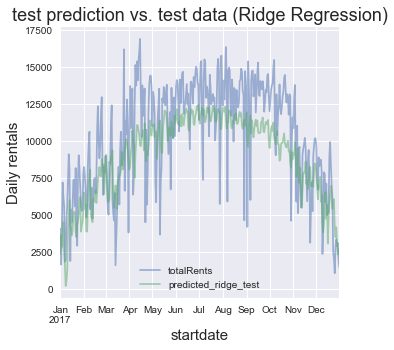

In [18]:
#predicted vs. actual plots
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.set_title('test prediction vs. test data (Ridge Regression)', fontsize=18)
ax.set_ylabel('Daily rentals',fontsize=15)
ax.set_xlabel('Day of the year (1 to 365)',fontsize=15)
totals_test[['totalRents', 'predicted_ridge_test']].plot(alpha=0.5, ax=ax)